In [39]:
import pandas as pd
import nltk
import string
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


In [3]:
train=pd.read_csv('input/train.tsv',sep='\t')
test=pd.read_csv('input/test.tsv',sep='\t')

In [4]:
print(train.shape)
print(test.shape)

(1482535, 8)
(693359, 7)


In [5]:
print(train.dtypes)

train_id               int64
name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object


In [12]:
print(train.head())
print(train.info())


   train_id                                 name  item_condition_id  \
0         0  MLB Cincinnati Reds T Shirt Size XL                  3   
1         1     Razer BlackWidow Chroma Keyboard                  3   
2         2                       AVA-VIV Blouse                  1   
3         3                Leather Horse Statues                  1   
4         4                 24K GOLD plated rose                  1   

                                       category_name brand_name  price  \
0                                  Men/Tops/T-shirts        NaN   10.0   
1  Electronics/Computers & Tablets/Components & P...      Razer   52.0   
2                        Women/Tops & Blouses/Blouse     Target   10.0   
3                 Home/Home Décor/Home Décor Accents        NaN   35.0   
4                            Women/Jewelry/Necklaces        NaN   44.0   

   shipping                                   item_description  
0         1                                 No description yet 

In [13]:
print(train.price.describe())
print(train.describe())


count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64
           train_id  item_condition_id         price      shipping
count  1.482535e+06       1.482535e+06  1.482535e+06  1.482535e+06
mean   7.412670e+05       1.907380e+00  2.673752e+01  4.472744e-01
std    4.279711e+05       9.031586e-01  3.858607e+01  4.972124e-01
min    0.000000e+00       1.000000e+00  0.000000e+00  0.000000e+00
25%    3.706335e+05       1.000000e+00  1.000000e+01  0.000000e+00
50%    7.412670e+05       2.000000e+00  1.700000e+01  0.000000e+00
75%    1.111900e+06       3.000000e+00  2.900000e+01  1.000000e+00
max    1.482534e+06       5.000000e+00  2.009000e+03  1.000000e+00


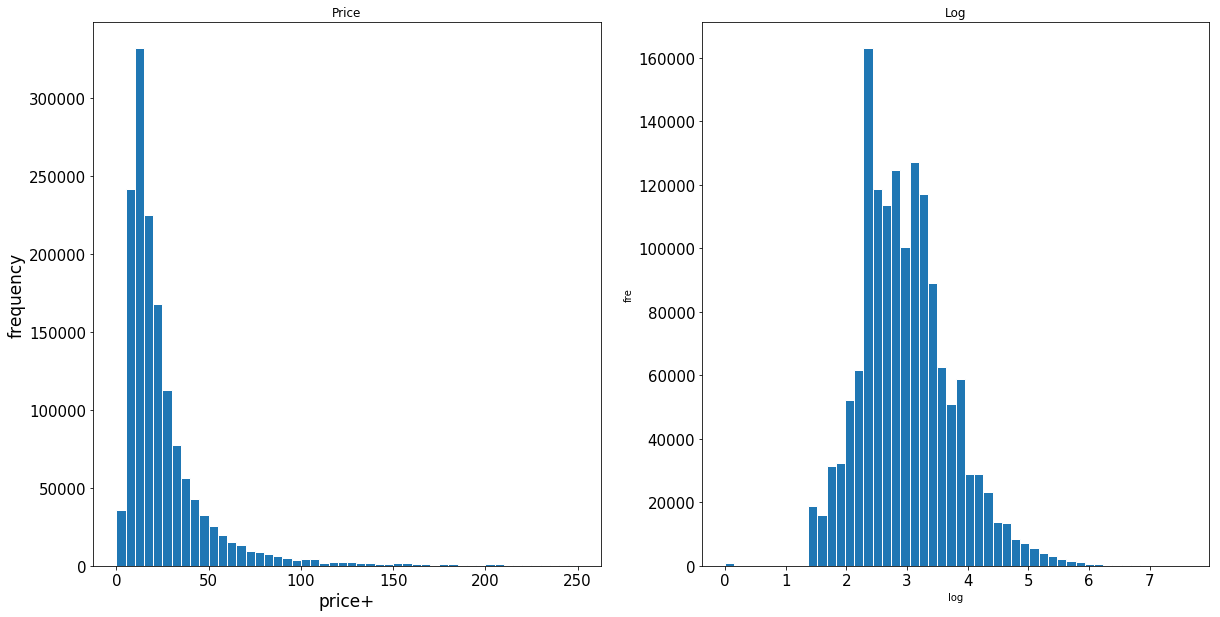

In [14]:
plt.subplot(1,2,1)
(train['price']).plot.hist(bins=50,figsize=(20,10),edgecolor='white',range=[0,250])
plt.xlabel('price+',fontsize=17)
plt.ylabel('frequency',fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Price')

plt.subplot(1,2,2)
np.log(train['price']+1).plot.hist(bins=50,figsize=(20,10),edgecolor='white')
plt.xlabel('log')
plt.ylabel('fre')
plt.tick_params(labelsize=15)
plt.title('Log')
plt.show()

In [15]:
train.shipping.value_counts()/len(train)

0    0.552726
1    0.447274
Name: shipping, dtype: float64

In [29]:
prc_shipBySeller=train.loc[train.shipping==1,'price']
prc_shipByBuyer=train.loc[train.shipping==0,'price']


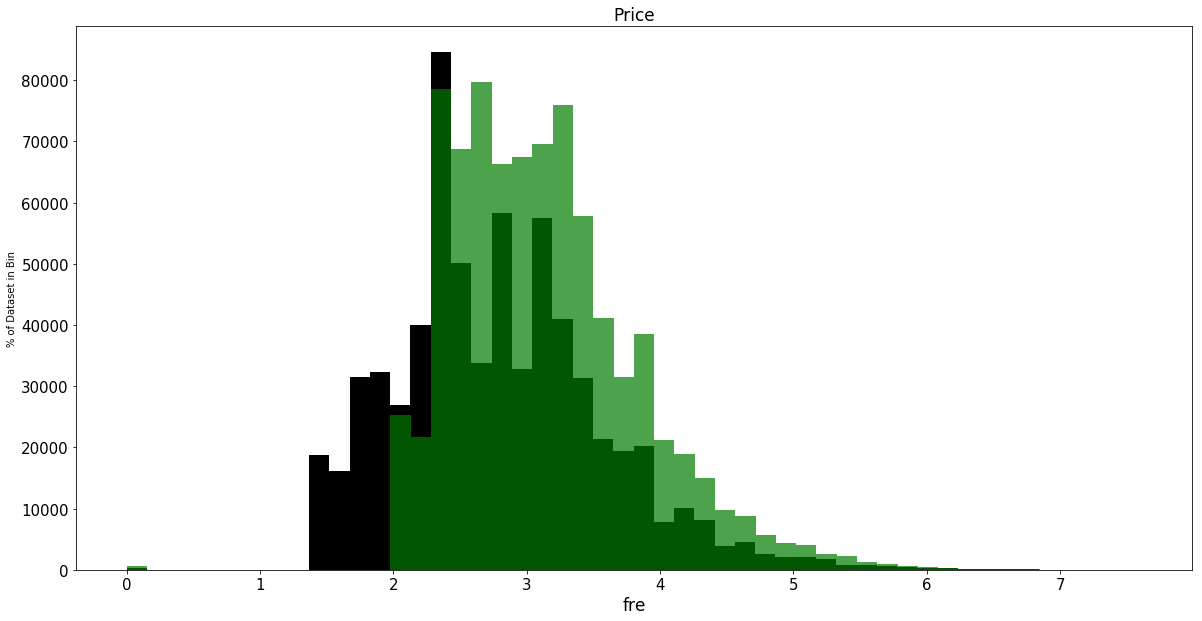

In [18]:
fig,ax=plt.subplots(figsize=(20,10))
ax.hist(np.log(prc_shipBySeller+1),color='black',alpha=1.0,bins=50,
       label='Price Seller')
ax.hist(np.log(prc_shipByBuyer+1),color='#007D00',alpha=0.7,bins=50,
       label='Price Buyer')
ax.set(title='Histogram',ylabel='% of Dataset in Bin')
plt.xlabel('log(price+1)',fontsize=17)
plt.xlabel('fre',fontsize=17)
plt.title('Price',fontsize=17)
plt.tick_params(labelsize=15)
plt.show()


In [19]:
print("There are %d unique values in the category column." % train['category_name'].nunique())

There are 1287 unique values in the category column.


In [20]:
train['category_name'].value_counts()[:5]

Women/Athletic Apparel/Pants, Tights, Leggings    60177
Women/Tops & Blouses/T-Shirts                     46380
Beauty/Makeup/Face                                34335
Beauty/Makeup/Lips                                29910
Electronics/Video Games & Consoles/Games          26557
Name: category_name, dtype: int64

In [27]:
print("There are %d items that do not have a label." % train['category_name'].isnull().sum())

There are 6327 items that do not have a label.


In [28]:
def split_cat(text):
    try:return text.split("/")
    except:return ("Nolabel","Nolabel","Nolabel")

In [30]:
train['general_cat'],train['subcat_1'],train['subcat_2']=\
zip(*train['category_name'].apply(lambda x:split_cat(x)))
train.head()


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,general_cat,subcat_1,subcat_2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


In [31]:
test['general_cat'],test['subcat_1'],test['subcat_2']=\
zip(*test['category_name'].apply(lambda x:split_cat(x)))
test.head()

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description,general_cat,subcat_1,subcat_2
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7,Women,Jewelry,Rings
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined...",Other,Office supplies,Shipping Supplies
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...,Vintage & Collectibles,Bags and Purses,Handbag
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and pe...,Women,Sweaters,Cardigan
4,4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,Rediscovering life after the loss of a loved o...,Other,Books,Religion & Spirituality


In [32]:
print("There are %d unique first sub-categories." % train['subcat_1'].nunique())


There are 114 unique first sub-categories.


In [33]:
print("There are %d unique second sub-categories." % train['subcat_2'].nunique())


There are 871 unique second sub-categories.


In [36]:
x=train['general_cat'].value_counts().index.values.astype('str')
y=train['general_cat'].value_counts().values
pct=[("%.2f"%(v*100))+"%"for v in (y/len(train))]

In [42]:
trace1=go.Bar(x=x,y=y,text=pct)
layout=dict(title='Number of Items',
           yaxis=dict(title='Count'),
           xaxis=dict(title='Category'))
fig=dict(data=[trace1],layout=layout)
py.iplot(fig)

In [43]:
x=train['subcat_1'].value_counts().index.values.astype('str')[:15]
y=train['subcat_1'].value_counts().values[:15]
pct=[("%.2f"%(v*100))+"%"for v in (y/len(train))][:15]

In [45]:
trace2 = go.Bar(x=x, y=y, text=pct,
               marker=dict(
               color=y,colorscale='Portland',showscale=True,
                   reversescale=False
               ))
layout = dict(title= 'Number of Items by Sub Category(Top 15)',
              yaxis = dict(title='Count'),
              xaxis = dict(title='SubCategory'))
fig=dict(data=[trace2], layout=layout)
py.iplot(fig)

In [49]:
general_cats=train['general_cat'].unique()
x=[train.loc[train['general_cat']==cat, 'price'] for cat in general_cats]